In [87]:
%pip install -r requirements.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached clip-1.0-py3-none-any.whl

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas 
from PIL import Image
full_df = pandas.read_csv('./mincult-train/train.csv', sep=';')
full_df['path'] = './mincult-train/train/'+ full_df['object_id'].astype(str) + '/' + full_df['img_name']
full_df['embedding_path'] = full_df['path']+'.embedding'
N = 100
df = full_df[:N].copy()

In [89]:
full_df['group'] = full_df['group'].replace('ДПИ',  'Декоративно-прикладное искусство')
full_df[full_df['group'] == 'ДПИ'] 

,object_id,name,description,group,img_name,path,embedding_path


In [90]:
# from PIL import Image
# import clip
# import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"using {device}")
# device = torch.device(device)
# model, preprocess = clip.load("ViT-B/32")
# model.to(device)

from sentence_transformers import SentenceTransformer, util

# We use the original clip-ViT-B-32 for encoding images
img_model = SentenceTransformer('clip-ViT-B-32')

KeyboardInterrupt: 

In [ ]:
df.iloc[[1]].path.values[0]

'./mincult-train/train/4489444/9461061.jpg'

In [ ]:
import json
GEN_EMBEDDING = True
if GEN_EMBEDDING: # if we need to generate embeddings from scratch
    for index, row in df.iterrows(): 
        embedding = img_model.encode(Image.open(row.path))
        with open(row.embedding_path, 'w') as f:
            f.write(json.dumps(embedding.tolist()))
    # embs = img_model.encode(df['path'].values.map(lambda p: Image.open(p)))
    # for i, emb in enumerate(embs): 
    #     with open(df.iloc[[i]].path.values[0], 'w') as f:
    #         json.dumps(emb.tolist())

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


In [ ]:
from scipy.spatial import distance

def find_best(image_path): 
    emb = img_model.encode([Image.open(image_path)])[0].tolist()
    distances = {} 
    for index, row in df.iterrows(): 
        with open(row.embedding_path, 'r') as f:
            other_emb = json.loads(f.readline())
            dist = distance.cosine(emb, other_emb)
            distances[index] = dist
    dists = sorted(list(distances.items()), key=lambda a: a[1])[:10] 
    for i, dist in dists: 
        print(df.loc[[i]].path)

In [ ]:
find_best('sword.jpg')

Unused or unrecognized kwargs: padding.


4    ./mincult-train/train/6339754/2592073.jpg
Name: path, dtype: object
51    ./mincult-train/train/4710627/2006145.jpg
Name: path, dtype: object
86    ./mincult-train/train/1450365/53887152.jpg
Name: path, dtype: object
12    ./mincult-train/train/9871461/6667278.jpg
Name: path, dtype: object
2    ./mincult-train/train/8722586/5095122.jpg
Name: path, dtype: object
52    ./mincult-train/train/19950844/20660667.jpg
Name: path, dtype: object
97    ./mincult-train/train/17099698/16722631.jpg
Name: path, dtype: object
27    ./mincult-train/train/4780854/1267334.jpg
Name: path, dtype: object
6    ./mincult-train/train/4704612/2008677.jpg
Name: path, dtype: object
19    ./mincult-train/train/21615364/22970356.jpg
Name: path, dtype: object


In [ ]:
# import ruclip.model as ruclip_model 
# import ruclip.processor as ruclip_processor
# import ruclip.predictor as ruclip_predictor
# ru_clip_model = ruclip_model.CLIP.from_pretrained('./ruclip').eval()
# tokenizer = ruclip_processor.RuCLIPProcessor.from_pretrained('./ruclip')
# ru_predictor = ruclip_predictor.Predictor(ru_clip_model, tokenizer, device)

In [ ]:
# ru_predictor.get_text_latents('hello')

tensor([[-0.0166,  0.0004, -0.0030,  ...,  0.0460, -0.0296, -0.0237],
        [-0.0431, -0.0181, -0.0073,  ...,  0.0496, -0.0511,  0.0209],
        [-0.0248, -0.0026, -0.0176,  ...,  0.0443, -0.0488, -0.0087],
        [-0.0248, -0.0026, -0.0176,  ...,  0.0443, -0.0488, -0.0087],
        [-0.0196, -0.0098, -0.0140,  ...,  0.0447, -0.0737, -0.0166]],
       grad_fn=<DivBackward0>)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# We use the original clip-ViT-B-32 for encoding images
img_model = SentenceTransformer('clip-ViT-B-32')

# Our text embedding model is aligned to the img_model and maps 50+
# languages to the same vector space
text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')

In [ ]:
# # Now we load and encode the images
# def load_image(url_or_path):
#     if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
#         return Image.open(requests.get(url_or_path, stream=True).raw)
#     else:
#         return Image.open(url_or_path)

# # We load 3 images. You can either pass URLs or
# # a path on your disc
# img_paths = [
#     # Dog image
#     "sword.jpg",

#     # Cat image
#     "test_image.jpg",

#     # Beach image
#     "test_headphones.jpg",
# ]

# images = [load_image(img) for img in img_paths]

# # Map images to the vector space
# img_embeddings = img_model.encode(images)

# # Now we encode our text:
# texts = [
#     "high tech",
#     "weapon",  # German: A cat
#     "document"  # Spanish: a beach with palm trees
# ]

# text_embeddings = text_model.encode(texts)

# # Compute cosine similarities:
# cos_sim = util.cos_sim(text_embeddings, img_embeddings)

# for text, scores in zip(texts, cos_sim):
#     max_img_idx = torch.argmax(scores)
#     print("Text:", text)
#     print("Score:", scores[max_img_idx] )
#     print("Path:", img_paths[max_img_idx], "\n")

Unused or unrecognized kwargs: padding.


Text: high tech
Score: tensor(0.2404)
Path: test_headphones.jpg 

Text: weapon
Score: tensor(0.2538)
Path: sword.jpg 

Text: document
Score: tensor(0.2272)
Path: test_image.jpg 



In [ ]:
img_model.encode([Image.load("sword.jpg")])

NameError: name 'img_model' is not defined

tensor([1., 2., 3.])

In [111]:
import numpy.linalg
from scipy.special import softmax 
import torch

categories = full_df['group'].unique().tolist()
categories.remove('Прочие')
# categories = categories.remove('ДПИ')
# categories.append('Декоративно-прикладное искусство')
pref = "это музейный экспонат категории "
texts = [pref+c for c in categories]
text_features = torch.Tensor(text_model.encode(texts))
text_features /= text_features.norm(dim=-1, keepdim=True)
def get_categories(img: str | Image.Image):
    if isinstance(img, str): 
        img = Image.open(img)
    # Download the dataset
    # data_path = 'data/train.csv'
    # image_path = 'data/3850376.jpg'


    # Vectors creating
    # image_input = preprocess(img).unsqueeze(0).to(device)
    # text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in categories]).to(device)

    image_features = torch.Tensor(img_model.encode([img])[0])
    # dists = []
    # for i, t in enumerate(texts): 
    #     dists.append(distance.cosine(text_features[i], image_features))

    # dists = {categories[i]: dist for i, dist in enumerate(dists)}
    # best = sorted(list(dists.items()),key=lambda a: a[1])[:5]
    # print(best)
    # return best

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    similarity = enumerate((100.0 * image_features @ text_features.T).softmax(dim=-1).tolist())
    # print(similarity)
    res = [[categories[i], conf] for i, conf in sorted(similarity, key=lambda a: a[1], reverse=True)]
    # if res[0][1] < 0.2:
    #     res[0][0] = 'Прочие'
    if res[0][0] == 'Печатная продукция': 
        res = res[1:]
    return res

In [124]:
TEST_N = 300
test_df = full_df.sample(TEST_N)
test_df['group_pred'] = test_df['path'].map(lambda path: get_categories(path)[0][0])
correct = (test_df['group'] == test_df['group_pred']).sum() 
print(correct/len(test_df))

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


0.39


In [125]:
correct = (test_df['group'] == test_df['group_pred']).sum() 
print(correct/len(test_df))

0.39


Text(0, 0.5, 'Кол-во ошибок на 300')

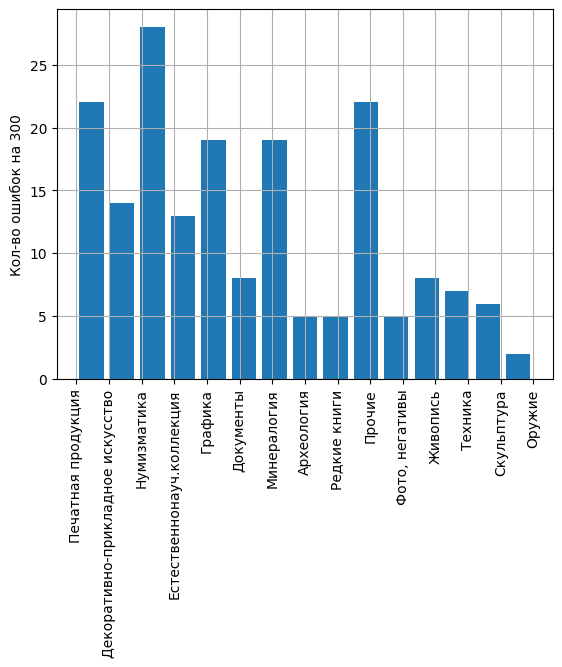

In [126]:
mistakes = test_df[test_df['group'] != test_df['group_pred']]
plt = mistakes.group.hist(xrot=90, bins=15, rwidth=0.8)
plt.set_ylabel(f'Кол-во ошибок на {TEST_N}')

Text(0, 0.5, 'Кол-во ошибок на 300')

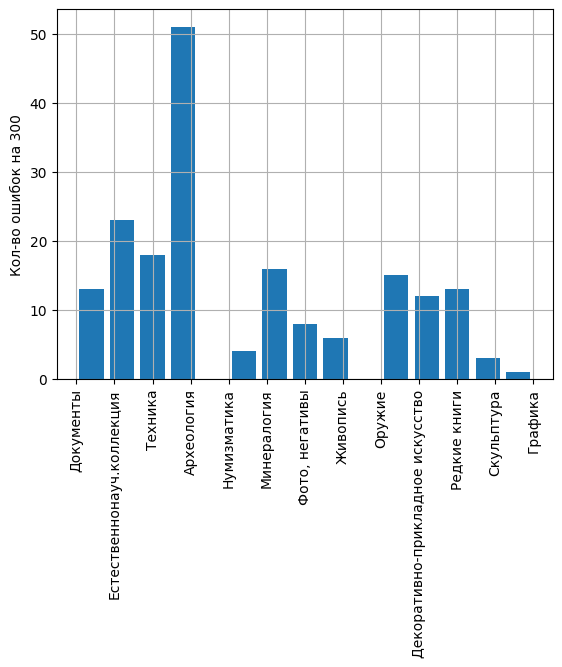

In [127]:
plt = mistakes.group_pred.hist(xrot=90, bins=15, rwidth=0.8)
plt.set_ylabel(f'Кол-во ошибок на {TEST_N}')

In [128]:
mistakes.head()

,object_id,name,description,group,img_name,path,embedding_path,group_pred
11884,13164884,"Газета. ""За мир и труд"" № 196.",Ежедневная красноармейская газета Революционно...,Печатная продукция,14177502.jpg,./mincult-train/train/13164884/14177502.jpg,./mincult-train/train/13164884/14177502.jpg.em...,Документы
1805,9690525,Кружева тканные на одежду. Принадлежали Ветчи...,NaN,Декоративно-прикладное искусство,14172565.jpg,./mincult-train/train/9690525/14172565.jpg,./mincult-train/train/9690525/14172565.jpg.emb...,Естественнонауч.коллекция
5169,19936812,Значок нагрудный «50 лет СССР»,Из металла желтого цвета. На фоне красного ква...,Нумизматика,20641853.jpg,./mincult-train/train/19936812/20641853.jpg,./mincult-train/train/19936812/20641853.jpg.em...,Техника
6405,24380734,Палеонтологический образец. Брахиопода. Brachi...,"Верхи среднего девона, фрагмент вмещающей поро...",Естественнонауч.коллекция,26834483.jpg,./mincult-train/train/24380734/26834483.jpg,./mincult-train/train/24380734/26834483.jpg.em...,Археология
16338,19938160,Монета. 1 копейка. Клад,NaN,Нумизматика,20643506.jpg,./mincult-train/train/19938160/20643506.jpg,./mincult-train/train/19938160/20643506.jpg.em...,Естественнонауч.коллекция
